## import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

/Users/sejal/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py:14: UserWarning: A NumPy version >=1.25.2 and <2.6.0 is required for this version of SciPy (detected version 1.24.3)
  from scipy.sparse import csr_matrix, issparse


## 1: Read data from CSV file

In [2]:
data = pd.read_csv('apples_and_oranges.csv')
print(data.head())

   Weight  Size   Class
0      69  4.39  orange
1      69  4.21  orange
2      65  4.09  orange
3      72  5.85   apple
4      67  4.70  orange


## 2: Split data into training and test sets

In [3]:
training_set, test_set = train_test_split(data, test_size=0.2, random_state=1)
x_train = training_set.iloc[:, 0:2].values
y_train = training_set.iloc[:, 2].values
x_test = test_set.iloc[:, 0:2].values
y_test = test_set.iloc[:, 2].values

## 3: Encode string labels (Apples/Oranges) into numbers

In [4]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

## 4: Train SVM model

In [6]:
classifier = SVC(kernel='rbf', random_state=1, C=1, gamma='auto')
classifier.fit(x_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## 5: Evaluate the model

In [7]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
accuracy = float(cm.diagonal().sum()) / len(y_test)
print('Model Accuracy: {:.2f}%'.format(accuracy * 100))


Confusion Matrix:
 [[3 0]
 [1 4]]
Model Accuracy: 87.50%


## 6: Visualize Training Data Decision Boundary

/var/folders/9k/pd0g_ft52pq8ct_g74dzh3600000gn/T/ipykernel_2370/1567476510.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(
/var/folders/9k/pd0g_ft52pq8ct_g74dzh3600000gn/T/ipykernel_2370/1567476510.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


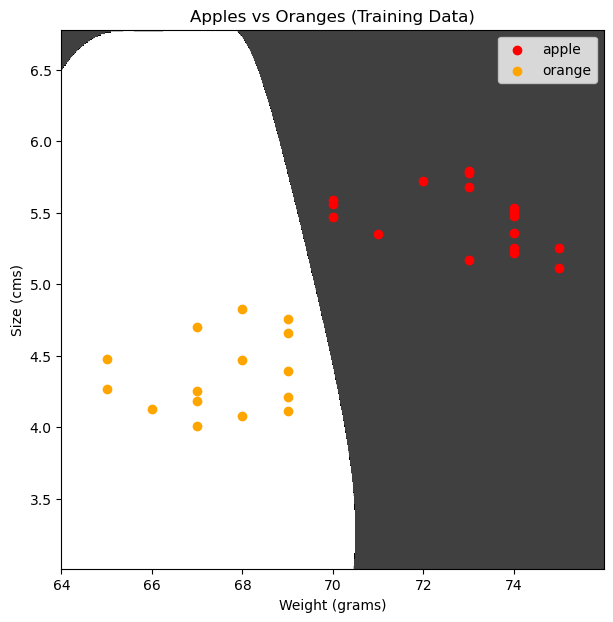

In [8]:
plt.figure(figsize=(7,7))
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
    np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01)
)
plt.contourf(
    x1, x2,
    classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(('black','white'))
)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c=ListedColormap(('red','orange'))(i),
        label=lb.inverse_transform([j])[0]
    )
plt.title('Apples vs Oranges (Training Data)')
plt.xlabel('Weight (grams)')
plt.ylabel('Size (cms)')
plt.legend()
plt.show()

## 7: Visualize Test Predictions

/var/folders/9k/pd0g_ft52pq8ct_g74dzh3600000gn/T/ipykernel_2370/3988627641.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(
/var/folders/9k/pd0g_ft52pq8ct_g74dzh3600000gn/T/ipykernel_2370/3988627641.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


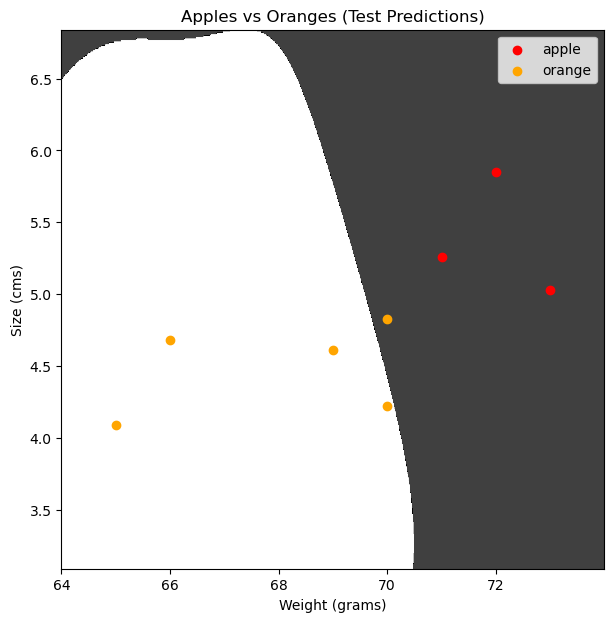

In [9]:
plt.figure(figsize=(7,7))
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
    np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01)
)
plt.contourf(
    x1, x2,
    classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(('black','white'))
)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0],
        x_set[y_set == j, 1],
        c=ListedColormap(('red','orange'))(i),
        label=lb.inverse_transform([j])[0]
    )
plt.title('Apples vs Oranges (Test Predictions)')
plt.xlabel('Weight (grams)')
plt.ylabel('Size (cms)')
plt.legend()
plt.show()

In [10]:
new_data = [[130, 7]]
print("Predicted:", lb.inverse_transform(classifier.predict(new_data)))

Predicted: ['apple']
